# Projet 2 : Academy (OC)

Auteur : Matthieu cazier

## Problèmes

--> Quels sont les pays avec un fort potentiel de clients pour nos services ?

--> Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

--> Dans quels pays l'entreprise doit-elle opérer en priorité ?

### Checklist de base 

Analyse de forme
<ul>
<li>Variable target : Contry Name / indicator name</li>
<li>Ligne et colonnes : (886930, 70)</li>
<li>Detail : 3665 paramètres // 242 pays</li>
<li>Type de variable : qualitatives : 4 /// quantitatives : 66</li>
</ul>


### Choix des bibliothèques 

In [195]:
import pandas as pd
import os 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [197]:
os.chdir('c://Users/Matthieu/Documents/Formations/Parcours/Projet2') #chemin
#os.chdir('C://Users/matthieu.cazier/Documents/OC/P2')

### Créer le dataset

In [198]:
dataset = pd.read_csv('EdStatsData.csv', sep=',')

### Observation du dataset

In [199]:
dataset.shape  #taille du dataset

(886930, 70)

In [200]:
#nom des colonnes
dataset.columns    


Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [201]:
#vue d'ensemble
dataset.head()   

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [202]:
#type de data
dataset.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

#infos sur le dataset
dataset.info()

In [203]:
#avoir des stats (moy/ std/ quartille) pour toutes les données du dataset
dataset.describe()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
count,7.228800e+04,3.553700e+04,3.561900e+04,3.554500e+04,3.573000e+04,8.730600e+04,3.748300e+04,3.757400e+04,3.757600e+04,3.680900e+04,...,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,5.143600e+04,0.0
mean,1.974772e+09,4.253638e+09,4.592365e+09,5.105006e+09,5.401493e+09,2.314288e+09,5.731808e+09,6.124437e+09,6.671489e+09,7.436724e+09,...,7.224868e+02,7.271290e+02,7.283779e+02,7.266484e+02,7.228327e+02,7.176899e+02,7.113072e+02,7.034274e+02,6.940296e+02,NaN
std,1.211687e+11,1.804814e+11,1.914083e+11,2.059170e+11,2.112150e+11,1.375059e+11,2.215546e+11,2.325489e+11,2.473986e+11,2.660957e+11,...,2.215845e+04,2.287990e+04,2.352338e+04,2.408149e+04,2.455897e+04,2.496587e+04,2.530183e+04,2.556069e+04,2.574189e+04,NaN
min,-1.435564e+00,-1.594625e+00,-3.056522e+00,-4.032582e+00,-4.213563e+00,-3.658569e+00,-2.950945e+00,-3.174870e+00,-3.558749e+00,-2.973612e+00,...,-1.630000e+00,-1.440000e+00,-1.260000e+00,-1.090000e+00,-9.200000e-01,-7.800000e-01,-6.500000e-01,-5.500000e-01,-4.500000e-01,NaN
25%,8.900000e-01,8.853210e+00,9.240920e+00,9.595200e+00,9.861595e+00,1.400000e+00,9.312615e+00,9.519913e+00,1.000000e+01,1.000000e+01,...,3.000000e-02,3.000000e-02,2.000000e-02,2.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,NaN
50%,6.317724e+00,6.316240e+01,6.655139e+01,6.969595e+01,7.087760e+01,9.677420e+00,7.101590e+01,7.133326e+01,7.290512e+01,7.510173e+01,...,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.300000e-01,2.200000e-01,NaN
75%,6.251250e+01,5.655200e+04,5.863650e+04,6.202900e+04,6.383675e+04,7.854163e+01,5.682800e+04,5.739175e+04,5.940425e+04,6.411500e+04,...,7.505000e+00,7.500000e+00,7.300000e+00,7.100000e+00,6.722500e+00,6.080000e+00,5.462500e+00,4.680000e+00,4.032500e+00,NaN
max,1.903929e+13,1.986457e+13,2.100916e+13,2.238367e+13,2.282991e+13,2.300634e+13,2.424128e+13,2.521383e+13,2.622101e+13,2.730873e+13,...,2.951569e+06,3.070879e+06,3.169711e+06,3.246239e+06,3.301586e+06,3.337871e+06,3.354746e+06,3.351887e+06,3.330484e+06,NaN


In [204]:
# verifier les doublons
duplicate_rows_df = dataset[dataset.duplicated ()] 
print ("nombre de lignes en double:", duplicate_rows_df.shape)
new_df = dataset.drop_duplicates ()
print(new_df.shape)
print(dataset.shape)  # aucun duplicate

nombre de lignes en double: (0, 70)
(886930, 70)
(886930, 70)


##### Par rapport à la consigne je choisis de prendre en compte les données des 10 dernières années 

In [205]:
# renommer & le nb de données manquantes par année
dataset_country = dataset.reindex(columns = ["Country Name",
                                     "2005","2006","2007","2008",
                                     "2009","2010","2011","2012","2013","2014","2015","2016"])
dataset_country.describe()
dataset_country.isnull().sum()

Country Name         0
2005            702822
2006            746618
2007            749658
2008            752543
2009            744822
2010            644488
2011            740918
2012            739666
2013            749421
2014            773141
2015            755872
2016            870470
dtype: int64

In [206]:
# mettre en index les pays et compter le nombre de données par année et pays
dataset_country.set_index('Country Name')
dataset_country.groupby(['Country Name']).count().mean(axis=1).sort_values(ascending = False)


Country Name
Colombia                    1021.333333
Lithuania                    949.500000
Mexico                       949.000000
Bulgaria                     943.583333
El Salvador                  932.500000
                               ...     
American Samoa                 8.833333
Isle of Man                    7.500000
Faroe Islands                  6.666667
Northern Mariana Islands       6.000000
St. Martin (French part)       1.500000
Length: 242, dtype: float64

Je voulais trier par pays qui avait le plus de données mais je perdais trop d'info

J'ai donc décidé de chercher dans un premier temps quels paramètres étaient renseignés et lequels avaient une utilité pour l'entreprise. 


### Vue d'ensemble

In [207]:
df = dataset.copy()

In [208]:
df.dtypes

Country Name       object
Country Code       object
Indicator Name     object
Indicator Code     object
1970              float64
                   ...   
2085              float64
2090              float64
2095              float64
2100              float64
Unnamed: 69       float64
Length: 70, dtype: object

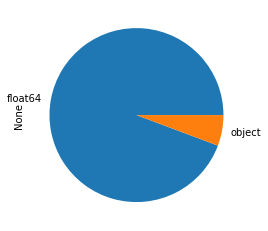

In [209]:
df.dtypes.value_counts().plot.pie()

### Choix des paramètres

In [210]:
df = df.drop(["Country Code","Indicator Code","1970","1971","1972",               #supprimer les colonnes inutilent
              "1973","1974","1975","1976","1977","1978","1979","1980",
              "1981","1982","1983","1984","1985","1986","1987","1988",
              "1989","1990","1991","1992","1993","1994","1995","1996",
              "1997","1998","1999","2000","2001","2002","2003","2004","2005","2006",
              "2017","2020",
              "2025","2030","2035","2040","2045","2050","2055","2060","2065","2070",
              "2075","2080","2085","2090","2095","2100","Unnamed: 69"],axis=1)

On garde que les 10 dernières années

In [211]:
df = df.pivot(index = 'Indicator Name', columns = 'Country Name')          ## paramètre en ligne & pays/année en colonnes

In [212]:
print(df)

                                                          2007          \
Country Name                                       Afghanistan Albania   
Indicator Name                                                           
Adjusted net enrolment rate, lower secondary, b...   28.059870     NaN   
Adjusted net enrolment rate, lower secondary, f...   15.223100     NaN   
Adjusted net enrolment rate, lower secondary, g...    0.379130     NaN   
Adjusted net enrolment rate, lower secondary, m...   40.152851     NaN   
Adjusted net enrolment rate, primary, both sexe...         NaN     NaN   
...                                                        ...     ...   
Youth illiterate population, 15-24 years, male ...         NaN     NaN   
Youth literacy rate, population 15-24 years, bo...         NaN     NaN   
Youth literacy rate, population 15-24 years, fe...         NaN     NaN   
Youth literacy rate, population 15-24 years, ge...         NaN     NaN   
Youth literacy rate, population 15-24 

In [213]:
df = df.isna().sum(axis=1)/df.shape[1]        #### le pourcentage de données manquante par paramètre

In [214]:
df = df.sort_values()    ###ranger par ordre

In [215]:
df = df[df <0.7]      ### supprimer les lignes qui comporte plus de 70% de données manquantes

L'objectif ici est d'avoir les 3665 paramètre en ligne et les pays/ année en colonnes. 
j'ai supprimer les lignes (Indicator), si ils avaient plus de 70% de données manquante. 
Il me reste 644 paramètres (lignes) ce qui me permet de faire un choix en fonction de la stratégie de l'entreprise.




Maintenant par rapport au besoin de l'entreprise je me concentre sur 5 paramètres fondamentaux pour répondre aux différentes questions : La population totale du pays, le % de personnes qui utilisent internet, la population ciblée par l'entreprise (15-24 ans), la population dans les classes ciblée par l'entreprise, le PIB du pays.

### Aperçu des données par région

In [216]:
#je récupère le fichier du début
dataset = dataset.reindex(columns = ["Indicator Name","Country Name",
                                     "2007","2008","2009","2010","2011","2012","2013","2014","2015","2016"])

In [217]:
liste_region = ["East Asia & Pacific","Europe & Central Asia","Latin America & Caribbean",
                "Middle East & North Africa","North America","South Asia","Sub-Saharan Africa"]

In [218]:
# je commence par les personnes qui ont internet
df_internet_region = dataset.loc[dataset['Indicator Name']=="Internet users (per 100 people)"] # je sélectionne mon paramètre
df_internet_region = df_internet_region.drop(['Indicator Name'], axis = 1 )    #je supprime la colonne
df_internet_region = df_internet_region.set_index('Country Name')     #je mets les noms de pays en index
df_internet_region = df_internet_region.reindex(liste_region)  ## je garde seulment les régions

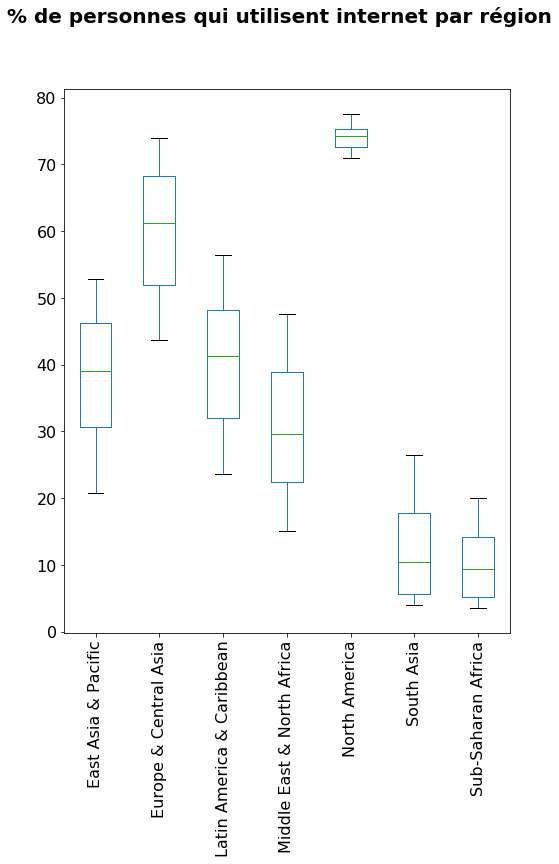

In [219]:
#je fais une boite à moustache pour avoir la répartition des valeurs
df_internet_region = np.transpose(df_internet_region)
plt.figure(figsize=(8,10))
plt.suptitle('% de personnes qui utilisent internet par région',fontsize = 20, x = 0.5, y = 0.995,fontweight = 'bold')
boxplot = df_internet_region.boxplot(grid=False,rot=90,fontsize=16)

In [220]:
# Puis la population totale
df_pop_tot_region = dataset.loc[dataset['Indicator Name']=="Population, total"]
df_pop_tot_region = df_pop_tot_region.drop(['Indicator Name'], axis = 1 )    
df_pop_tot_region = df_pop_tot_region.set_index('Country Name') 
df_pop_tot_region = df_pop_tot_region.reindex(liste_region) 

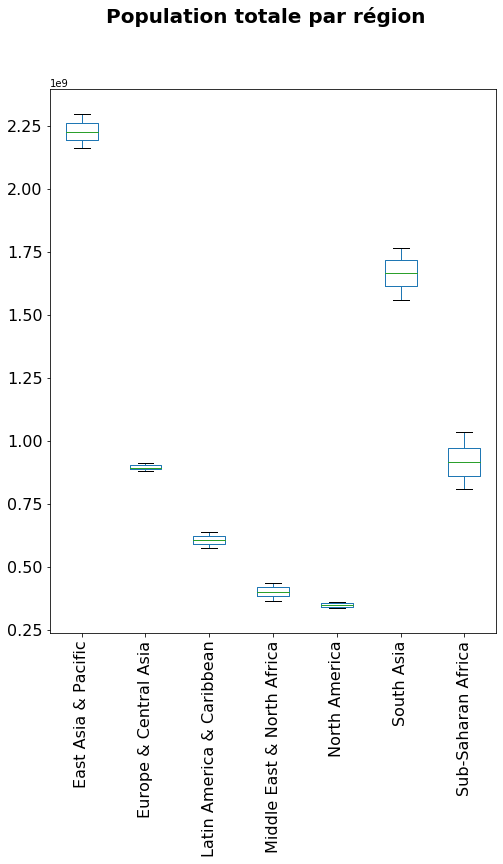

In [221]:
# Graphique population totale par région
df_pop_tot_region = np.transpose(df_pop_tot_region)
plt.figure(figsize=(8,10))
plt.suptitle('Population totale par région',fontsize = 20, x = 0.5, y = 0.995,fontweight = 'bold')
boxplot = df_pop_tot_region.boxplot(grid=False,rot=90,fontsize=16) 

In [222]:
#Pour finir le nombre de personnes qui sont dans les classes visées par l'entreprise
df_pop_second_region = dataset.loc[dataset['Indicator Name']=="Population of the official age for lower secondary education, both sexes (number)"]
df_pop_second_region = df_pop_second_region.drop(['Indicator Name'], axis = 1 )    
df_pop_second_region = df_pop_second_region.set_index('Country Name') 
df_pop_second_region = df_pop_second_region.reindex(liste_region)   

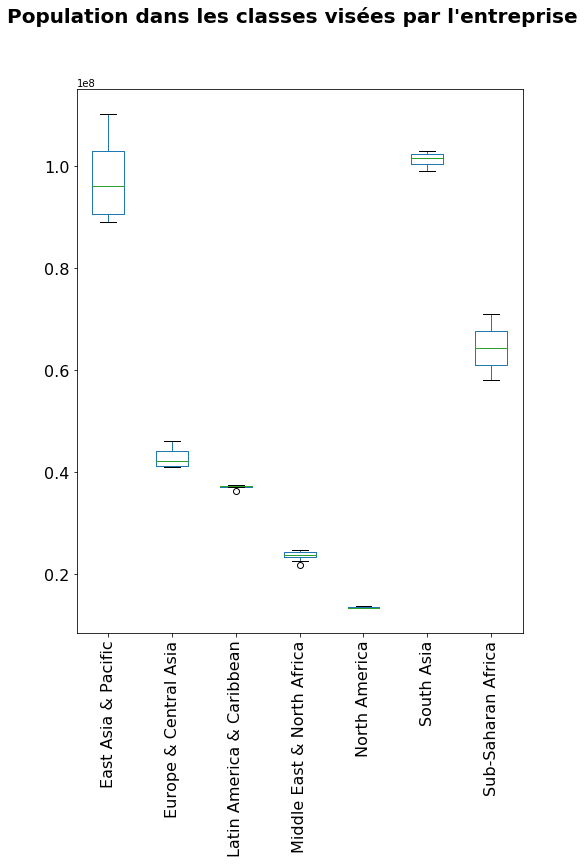

In [223]:
#graphique du nombre de personnes dans les écoles ciblées par région
df_pop_second_region = np.transpose(df_pop_second_region)
plt.figure(figsize=(8,10))
plt.suptitle("Population dans les classes visées par l'entreprise",fontsize = 20, x = 0.5, y = 0.995,fontweight = 'bold')
boxplot = df_pop_second_region.boxplot(grid=False,rot=90,fontsize=16) 

Je vais maintenant me concentrer sur les pays

### Paramètre 1 : le % de personne qui ont internet

In [224]:
# je recupère les données de départ et je prends les colonnes dont j'ai besoin
dataset = dataset.reindex(columns = ["Country Name","Indicator Name",
                                     "2007","2008","2009","2010","2011","2012","2013","2014","2015","2016"])

In [225]:
# J'isole le 1er parametre et je s'implifie le tableau
df_internet = dataset.loc[dataset['Indicator Name']=="Internet users (per 100 people)"]
df_internet = df_internet.drop(['Indicator Name'], axis = 1 )

In [226]:
# Permet d'avoir une visualisation des données
for label, row in df_internet.iterrows():
    print(label)
    print(row)  

1375
Country Name    Arab World
2007               14.2059
2008               18.5935
2009               22.9737
2010               26.7473
2011               29.7078
2012               34.0142
2013               36.8686
2014                   NaN
2015                   NaN
2016                   NaN
Name: 1375, dtype: object
5040
Country Name    East Asia & Pacific
2007                        20.7665
2008                        25.2536
2009                        29.5132
2010                        34.2308
2011                        37.3652
2012                        40.7093
2013                        44.5773
2014                        46.8121
2015                        49.7879
2016                        52.7963
Name: 5040, dtype: object
8705
Country Name    East Asia & Pacific (excluding high income)
2007                                                14.3827
2008                                                19.2601
2009                                                23.7692


404525
Country Name    Hong Kong SAR, China
2007                            64.8
2008                            66.7
2009                            69.4
2010                              72
2011                            72.2
2012                            72.9
2013                            74.2
2014                         79.8663
2015                         84.9484
2016                         87.3003
Name: 404525, dtype: object
408190
Country Name    Hungary
2007               53.3
2008                 61
2009                 62
2010                 65
2011              68.02
2012              70.58
2013            72.6439
2014            75.6532
2015            72.8347
2016            79.2594
Name: 408190, dtype: object
411855
Country Name    Iceland
2007               90.6
2008                 91
2009                 93
2010              93.39
2011            94.8197
2012            96.2098
2013            96.5468
2014              98.16
2015               98.2
2016        

In [227]:
#je mets les noms de ville en index, et je compte le nombre de valeurs manquantes dans le fichier
df_internet = df_internet.set_index('Country Name')
df_internet_non = sum([df_internet.isnull()])
df_internet_non = np.sum(df_internet_non,axis=1)

In [228]:
# je crée une colonne avec le nombre de valeurs manquantes par pays
df_internet['df_internet_non'] = df_internet_non

In [229]:
#je range le tableau en ordre décroissant par rapport à la colonne des "non"
#Puis je supprime toutes les lignes qui ont plus de 3 valeurs manquantes sur 10 car je considère que ces pays n'ont pas assez de données
#je passe de 242 à 229 pays
df_internet = df_internet.sort_values(by='df_internet_non')
df_internet = df_internet[df_internet['df_internet_non'] < 7]

Le premier objectif est de supprimer les pays qui possèdent plus de 70% de données manquantes (sur 10ans) sur le paramètre internet. 
Je passe maintenant au nettoyage des données.

In [230]:
#je change de sens mon tableau, puis je supprime la ligne qui compte les "non" 
#je crée une variable : "value" qui possède les moyennes des pays à qui ils manquent au moins une donnée 
df_internet = np.transpose(df_internet)
df_internet = df_internet.drop(['df_internet_non'])
value = {'Somalia':df_internet['Somalia'].mean(),
         'Seychelles':df_internet['Seychelles'].mean(),
         'New Caledonia':df_internet['New Caledonia'].mean(),
         'Libya':df_internet['Libya'].mean(),
         'Sudan':df_internet['Sudan'].mean(),
         'European Union':df_internet['European Union'].mean(),
         'Gibraltar':df_internet['Gibraltar'].mean(),
         'OECD members':df_internet['OECD members'].mean(),
         'Arab World':df_internet['Arab World'].mean(),
         'San Marino':df_internet['San Marino'].mean()}

In [231]:
# Je remplace les valeurs manquantes pas les propres moyennes des pays qui ont les valeurs manquantes
df_internet = df_internet.fillna(value=value) # le tableau n'a plus de valeur manquante
df_internet_complet = df_internet # je garde une copie pour après

In [232]:
#je calcule la moyenne par pays, je la range par ordre décroissante puis je mets un seuil pour éliminer les pays qui n'utilise par internet et qui ne seront donc par intéressant pour notre études
#On passe de 229 à 79 pays
df_internet = df_internet.mean().sort_values(ascending = False)
df_internet = df_internet[df_internet > 50 ]

Pour mettre le seuil de 50, je me suis basé sur la France (78%) comme l'entreprise fonctionne bien en France si on prend les mêmes valeurs, l'entreprise pourra s'implenter dans ces pays.

On passe de 229 pays avec des données utilisablent à 79 pays potentiellement intéressants

### Paramètre 2 : Population totale du pays

In [233]:
#je récupère mon fichier du début
df_pop_tot = dataset.loc[dataset['Indicator Name']=="Population, total"]
df_pop_tot = df_pop_tot.drop(['Indicator Name'], axis = 1 )

In [234]:
for label, row in df_pop_tot.iterrows():
    print(label)
    print(row)  

2533
Country Name     Arab World
2007            3.24693e+08
2008            3.32425e+08
2009            3.40149e+08
2010            3.47737e+08
2011            3.55137e+08
2012            3.62467e+08
2013            3.69762e+08
2014                    NaN
2015                    NaN
2016                    NaN
Name: 2533, dtype: object
6198
Country Name    East Asia & Pacific
2007                    2.16043e+09
2008                    2.17583e+09
2009                    2.19081e+09
2010                    2.20561e+09
2011                    2.22036e+09
2012                    2.23543e+09
2013                    2.25055e+09
2014                     2.2659e+09
2015                     2.2812e+09
2016                    2.29679e+09
Name: 6198, dtype: object
9863
Country Name    East Asia & Pacific (excluding high income)
2007                                            1.92266e+09
2008                                            1.93677e+09
2009                                            1

Country Name    Virgin Islands (U.S.)
2007                           107423
2008                           107091
2009                           106707
2010                           106267
2011                           105784
2012                           105275
2013                           104737
2014                           104170
2015                           103574
2016                           102951
Name: 871138, dtype: object
874803
Country Name    West Bank and Gaza
2007                    3.4945e+06
2008                   3.59669e+06
2009                   3.70222e+06
2010                    3.8111e+06
2011                   3.92705e+06
2012                    4.0469e+06
2013                   4.16951e+06
2014                   4.29468e+06
2015                   4.42214e+06
2016                   4.55157e+06
Name: 874803, dtype: object
878468
Country Name    Yemen, Rep.
2007            2.17516e+07
2008            2.23564e+07
2009            2.29749e+07
2010           

In [235]:
#je compte le nombre de "nom" puis je crée une colonne
df_pop_tot = df_pop_tot.set_index('Country Name')
df_pop_tot_non = sum([df_pop_tot.isnull()])
df_pop_tot_non = np.sum(df_pop_tot_non,axis=1)

df_pop_tot['df_pop_tot_non'] = df_pop_tot_non

In [236]:
# je trie par ordre décroissant le nombre de "non" pius je supprime les pays qui ont plus de 3 données manquantes
df_pop_tot = df_pop_tot.sort_values(by='df_pop_tot_non')
df_pop_tot = df_pop_tot[df_pop_tot['df_pop_tot_non'] < 7] 
# je supprime les pays qui possèdent 70% de données manquantes. Je passe de 242 à 240 pays

In [237]:
#je rends lisible mon fichier en supprimant une colonnes
df_pop_tot = np.transpose(df_pop_tot)
df_pop_tot = df_pop_tot.drop(['df_pop_tot_non'])

In [238]:

value1 = {'European Union':df_pop_tot['European Union'].mean(),
         'St. Martin (French part)':df_pop_tot['St. Martin (French part)'].mean(),
         'Arab World':df_pop_tot['Arab World'].mean(),
         'Curacao':df_pop_tot['Curacao'].mean(),
         'OECD members':df_pop_tot['OECD members'].mean(),
         'Sint Maarten (Dutch part)':df_pop_tot['Sint Maarten (Dutch part)'].mean(),
         'South Sudan':df_pop_tot['South Sudan'].mean(),
         'Eritrea':df_pop_tot['Eritrea'].mean()}


In [239]:
# Je remplace les valeurs manquantes pas les propres moyennes des pays qui ont les valeurs manquantes
df_pop_tot = df_pop_tot.fillna(value=value1)

In [240]:
# j'applique un seuil qui se rapproche de celui de la france 
df_pop_tot_complet = df_pop_tot  ## je garde cette copie pour après
df_pop_tot = df_pop_tot.mean().sort_values(ascending = False)
df_pop_tot = df_pop_tot[df_pop_tot > 10000000 ] # je passe de 240 à 109 pays

### Paramètre 3 : Population ciblée 

In [241]:
# je récupère mon fichier de base
dataset_pop_cible = dataset.reindex(columns = ["Country Name","Indicator Name",
                                     "2007","2008","2009","2010","2011","2012","2013","2014","2015"])

In [242]:
#j'isole le paramètre souhaité et je s'implifie mon tableau
df_pop_cible = dataset_pop_cible.loc[dataset_pop_cible['Indicator Name']=="Population, ages 15-24, total"]
df_pop_cible = df_pop_cible.drop(['Indicator Name'], axis = 1 )

In [243]:
for label, row in df_pop_cible.iterrows():
    print(label)
    print(row)  

2482
Country Name    Arab World
2007                   NaN
2008                   NaN
2009                   NaN
2010                   NaN
2011                   NaN
2012                   NaN
2013                   NaN
2014                   NaN
2015                   NaN
Name: 2482, dtype: object
6147
Country Name    East Asia & Pacific
2007                            NaN
2008                            NaN
2009                            NaN
2010                            NaN
2011                            NaN
2012                            NaN
2013                            NaN
2014                            NaN
2015                            NaN
Name: 6147, dtype: object
9812
Country Name    East Asia & Pacific (excluding high income)
2007                                                    NaN
2008                                                    NaN
2009                                                    NaN
2010                                                    NaN
201

379977
Country Name    Guam
2007             NaN
2008             NaN
2009             NaN
2010             NaN
2011             NaN
2012             NaN
2013             NaN
2014             NaN
2015             NaN
Name: 379977, dtype: object
383642
Country Name      Guatemala
2007            2.69019e+06
2008            2.76041e+06
2009            2.83442e+06
2010            2.91227e+06
2011            2.99419e+06
2012            3.07963e+06
2013            3.16684e+06
2014            3.25347e+06
2015            3.33778e+06
Name: 383642, dtype: object
387307
Country Name         Guinea
2007            1.84545e+06
2008            1.88754e+06
2009            1.93223e+06
2010            1.98018e+06
2011            2.03167e+06
2012            2.08651e+06
2013            2.14426e+06
2014            2.20423e+06
2015            2.26584e+06
Name: 387307, dtype: object
390972
Country Name    Guinea-Bissau
2007                   319611
2008                   330288
2009                   34149

In [244]:
# je cherche les valeurs 'non' puis je les compte et je les mets dans une colonne
df_pop_cible = df_pop_cible.set_index('Country Name')
df_pop_cible_non = sum([df_pop_cible.isnull()])
df_pop_cible_non = np.sum(df_pop_cible_non,axis=1)

df_pop_cible['df_pop_cible_non'] = df_pop_cible_non

In [245]:
# je range dans l'ordre décroissant et j'applique mon filtre 30% de valeurs manquantes 
df_pop_cible = df_pop_cible.sort_values(by='df_pop_cible_non')
df_pop_cible = df_pop_cible[df_pop_cible['df_pop_cible_non'] < 7] # je supprime les pays qui possède plus de 70% de données manquantes 242 à 181 pays

Pas de nettoyage de données car les 181 pays qui reste ont 100 % de données 

In [246]:
# le fichier ne présente plus aucunes données manquantes, je supprime la colonne des "non" 
df_pop_cible = np.transpose(df_pop_cible)
df_pop_cible = df_pop_cible.drop(['df_pop_cible_non'])
df_pop_cible_complet = df_pop_cible  # je garde cette copi pour après

In [247]:
# je mets un seuil par rapport à la France 
df_pop_cible = df_pop_cible.mean().sort_values(ascending = False)
df_pop_cible = df_pop_cible[df_pop_cible > 1000000 ] #on passe de 181 à 105 pays

### Paramètre 4 : Population niveau scolaire

In [248]:
#je récupère le fichier du début
pop_second = dataset.reindex(columns = ["Country Name","Indicator Name",
                                     "2007","2008","2009","2010","2011","2012","2013","2014","2015"])

In [249]:
#Je filtre avec le paramètre que je veux 
pop_second = dataset.loc[dataset['Indicator Name']=="Population of the official age for lower secondary education, both sexes (number)"]
pop_second = pop_second.drop(['Indicator Name'], axis = 1 )

In [250]:
for label, row in pop_second.iterrows():
    print(label)
    print(row)  

2311
Country Name     Arab World
2007            2.26713e+07
2008            2.27914e+07
2009            2.27136e+07
2010            2.27278e+07
2011            2.27276e+07
2012            2.27852e+07
2013            2.28751e+07
2014            2.22096e+07
2015                    NaN
2016                    NaN
Name: 2311, dtype: object
5976
Country Name    East Asia & Pacific
2007                    1.10198e+08
2008                     1.0598e+08
2009                    1.01939e+08
2010                    9.80498e+07
2011                    9.41685e+07
2012                    9.10856e+07
2013                     8.9583e+07
2014                    8.90202e+07
2015                            NaN
2016                            NaN
Name: 5976, dtype: object
9641
Country Name    East Asia & Pacific (excluding high income)
2007                                            1.02822e+08
2008                                             9.8612e+07
2009                                            9

416456
Country Name          India
2007            7.26424e+07
2008             7.3146e+07
2009            7.36477e+07
2010            7.41129e+07
2011            7.45403e+07
2012            7.49407e+07
2013            7.53173e+07
2014            7.56556e+07
2015            7.59316e+07
2016                    NaN
Name: 416456, dtype: object
420121
Country Name      Indonesia
2007            1.33761e+07
2008             1.3284e+07
2009            1.32653e+07
2010            1.33266e+07
2011            1.34757e+07
2012            1.37078e+07
2013            1.38837e+07
2014            1.39885e+07
2015            1.40545e+07
2016            1.41232e+07
Name: 420121, dtype: object
423786
Country Name    Iran, Islamic Rep.
2007                   4.04148e+06
2008                   3.82072e+06
2009                   3.61639e+06
2010                    3.4284e+06
2011                   3.28353e+06
2012                   3.19791e+06
2013                   2.11036e+06
2014                   2.10

Name: 804946, dtype: object
808611
Country Name    Tonga
2007             9539
2008             9551
2009             9561
2010             9599
2011             9654
2012            11825
2013            11964
2014            12149
2015            12371
2016            12505
Name: 808611, dtype: object
812276
Country Name    Trinidad and Tobago
2007                          61395
2008                          58683
2009                          56453
2010                          54553
2011                          52987
2012                          51991
2013                          51743
2014                          52016
2015                          52563
2016                          53230
Name: 812276, dtype: object
815941
Country Name    Tunisia
2007             566118
2008             550163
2009             535481
2010             521138
2011             507121
2012             495353
2013             486535
2014             480044
2015             475160
2016             

In [251]:
#je compte le nombre de 'non', puis je crée une colonne avec la somme de "non" par pays
pop_second = pop_second.set_index('Country Name')
pop_second_non = sum([pop_second.isnull()])
pop_second_non = np.sum(pop_second_non,axis=1)

pop_second['pop_second_non'] = pop_second_non

In [252]:
# Je change la colonne par ordre décroissant puis j'applique les 30%  
pop_second = pop_second.sort_values(by='pop_second_non')
pop_second = pop_second[pop_second['pop_second_non'] < 7]  # on passe de 242 à 222

In [253]:
# je retourne mon tableau et je supprime la colonnes des 'non'
pop_second = np.transpose(pop_second)
pop_second = pop_second.drop(['pop_second_non'])

In [254]:
value2 = {'Saudi Arabia':pop_second['Saudi Arabia'].mean(),
         'India':pop_second['India'].mean(),
         'Upper middle income':pop_second['Upper middle income'].mean(),
         'World':pop_second['World'].mean(),
         'Afghanistan':pop_second['Afghanistan'].mean(),
         'Vietnam':pop_second['Vietnam'].mean(),
         'Algeria':pop_second['Algeria'].mean(),
         'Bahrain':pop_second['Bahrain'].mean(),
         'Bangladesh':pop_second['Bangladesh'].mean(),
         'Yemen, Rep.':pop_second['Yemen, Rep.'].mean(),
         'Qatar':pop_second['Qatar'].mean(),
         'Azerbaijan':pop_second['Azerbaijan'].mean(),
         'Serbia':pop_second['Serbia'].mean(),
         'West Bank and Gaza':pop_second['West Bank and Gaza'].mean(),
         'Middle income':pop_second['Middle income'].mean(),
         'Sudan':pop_second['Sudan'].mean(),
         'Pakistan':pop_second['Pakistan'].mean(),
         'Libya':pop_second['Libya'].mean(),
         'Iran, Islamic Rep.':pop_second['Iran, Islamic Rep.'].mean(),
         'Liechtenstein':pop_second['Liechtenstein'].mean(),
         'Lebanon':pop_second['Lebanon'].mean(),
         'Lao PDR':pop_second['Lao PDR'].mean(),
         'Cyprus':pop_second['Cyprus'].mean(),
         'Kuwait':pop_second['Kuwait'].mean(),
         'Vanuatu':pop_second['Vanuatu'].mean(),
         'Malaysia':pop_second['Malaysia'].mean(),
         'Low income':pop_second['Low income'].mean(),
         'Thailand':pop_second['Thailand'].mean(),
         'Oman':pop_second['Oman'].mean(),
         'Moldova':pop_second['Moldova'].mean(),
         'Sri Lanka':pop_second['Sri Lanka'].mean(),
         'High income':pop_second['High income'].mean(),
         'Iraq':pop_second['Iraq'].mean(),
         'Jordan':pop_second['Jordan'].mean(),
         'Morocco':pop_second['Morocco'].mean(),
         'Myanmar':pop_second['Myanmar'].mean(),
         'Tunisia':pop_second['Tunisia'].mean(),
         'Egypt, Arab Rep.':pop_second['Egypt, Arab Rep.'].mean(),
         'United Arab Emirates':pop_second['United Arab Emirates'].mean(),
         'Lower middle income':pop_second['Lower middle income'].mean(),
         'Syrian Arab Republic':pop_second['Syrian Arab Republic'].mean(),
         'Low & middle income':pop_second['Low & middle income'].mean(),
         'Middle East & North Africa (excluding high income)':pop_second['Middle East & North Africa (excluding high income)'].mean(),
         'South Asia':pop_second['South Asia'].mean(),
         "Least developed countries: UN classification":pop_second['Least developed countries: UN classification'].mean(),
         'North America':pop_second['North America'].mean(),
         'Latin America & Caribbean (excluding high income)':pop_second['Latin America & Caribbean (excluding high income)'].mean(),
         'Middle East & North Africa':pop_second['Middle East & North Africa'].mean(),
         'OECD members':pop_second['OECD members'].mean(),
         'Arab World':pop_second['Arab World'].mean(),
         'Sub-Saharan Africa (excluding high income)':pop_second['Sub-Saharan Africa (excluding high income)'].mean(),
         'East Asia & Pacific':pop_second['East Asia & Pacific'].mean(),
         'East Asia & Pacific (excluding high income)':pop_second['East Asia & Pacific (excluding high income)'].mean(),
         'Euro area':pop_second['Euro area'].mean(),
         'Europe & Central Asia':pop_second['Europe & Central Asia'].mean(),
         'Sub-Saharan Africa':pop_second['Sub-Saharan Africa'].mean(),
         'Brazil':pop_second['Brazil'].mean(),
         'Europe & Central Asia (excluding high income)':pop_second['Europe & Central Asia (excluding high income)'].mean(),
         'European Union':pop_second['European Union'].mean(),
         'Ukraine':pop_second['Ukraine'].mean(),
         'Heavily indebted poor countries (HIPC)':pop_second['Heavily indebted poor countries (HIPC)'].mean(),
         'Latin America & Caribbean':pop_second['Latin America & Caribbean'].mean(),
         'San Mariao':pop_second['San Marino'].mean(),
         'Curacao':pop_second['Curacao'].mean(),
         'Armenia':pop_second['Armenia'].mean(),}


In [255]:
#je remplace chaque valeur par la moyenne de ce même pays
pop_second = pop_second.fillna(value=value2) #plus aucune donnée manquante
pop_second_complet = pop_second # je garde cette copie pour après

In [256]:
# j'applique un seuil en rapport avec les données de la france 
pop_second = pop_second.mean().sort_values(ascending = False)    # on passe de 222 à 90 pays
pop_second = pop_second[pop_second > 1000000 ]

### Paramètre 5 : Pib

Même procédé que les autres paramètres

In [257]:
pib = dataset.reindex(columns = ["Country Name","Indicator Name",
                                     "2007","2008","2009","2010","2011","2012","2013","2014","2015"])

In [258]:
pib = pib.loc[dataset['Indicator Name']=="GDP per capita (current US$)"]
pib = pib.drop(['Indicator Name'], axis = 1 )
pib.shape

(242, 10)

In [259]:
for label, row in pib.iterrows():
    print(label)
    print(row)  

1245
Country Name    Arab World
2007               5046.82
2008               6255.76
2009               5267.55
2010               6032.96
2011               7005.48
2012                7571.4
2013                  7716
2014                   NaN
2015                   NaN
Name: 1245, dtype: object
4910
Country Name    East Asia & Pacific
2007                        5664.14
2008                        6495.93
2009                           6648
2010                        7679.83
2011                        8844.82
2012                        9402.72
2013                         9447.7
2014                        9665.06
2015                        9541.87
Name: 4910, dtype: object
8575
Country Name    East Asia & Pacific (excluding high income)
2007                                                2474.91
2008                                                3108.73
2009                                                3348.19
2010                                                4010.46
201

Name: 367745, dtype: object
371410
Country Name    Greenland
2007              36232.7
2008                41023
2009              41277.5
2010              40532.5
2011              44212.4
2012              42398.6
2013              43967.2
2014              45317.1
2015              39569.1
Name: 371410, dtype: object
375075
Country Name    Grenada
2007            7324.19
2008            7947.44
2009            7395.09
2010            7365.67
2011            7410.41
2012            7583.19
2013            7956.08
2014            8569.78
2015            9333.27
Name: 375075, dtype: object
378740
Country Name       Guam
2007            27540.8
2008            29056.5
2009            30025.6
2010            30700.4
2011            30862.1
2012            32499.2
2013            33278.3
2014            34361.1
2015            35210.8
Name: 378740, dtype: object
382405
Country Name    Guatemala
2007              2489.96
2008              2794.22
2009              2635.75
2010            

Name: 829535, dtype: object
833200
Country Name     Uganda
2007            401.851
2008            449.693
2009            554.405
2010            595.206
2011             574.94
2012             637.13
2013             655.05
2014            702.881
2015            674.045
Name: 833200, dtype: object
836865
Country Name    Ukraine
2007            3068.61
2008            3891.04
2009            2545.48
2010            2965.14
2011            3569.76
2012            3855.42
2013            4029.72
2014            3104.66
2015            2124.66
Name: 836865, dtype: object
840530
Country Name    United Arab Emirates
2007                         42672.6
2008                         45758.9
2009                         33072.6
2010                         35049.1
2011                         40462.3
2012                         42112.2
2013                         43350.6
2014                         44449.7
2015                         39101.7
Name: 840530, dtype: object
844195
Country Na

In [260]:
pib = pib.set_index('Country Name')
pib_non = sum([pib.isnull()])
pib_non = np.sum(pib_non,axis=1)

pib['pib_non'] = pib_non

In [261]:
pib = pib.sort_values(by='pib_non')
pib = pib[pib['pib_non'] < 7]       #242 pays à 229


In [262]:
pib = np.transpose(pib)
pib = pib.drop(['pib_non'])

In [263]:
value3 = {'Congo, Dem. Rep.':pib['Congo, Dem. Rep.'].mean(),
         'Venezuela, RB':pib['Venezuela, RB'].mean(),
         'European Union':pib['European Union'].mean(),
         'Arab World':pib['Arab World'].mean(),
         'Puerto Rico':pib['Puerto Rico'].mean(),
         'Bermuda':pib['Bermuda'].mean(),
         'OECD members':pib['OECD members'].mean(),
         'South Sudan':pib['South Sudan'].mean(),
         'Eritrea':pib['Eritrea'].mean(),
         'Libya':pib['Libya'].mean(),
         'Monaco':pib['Monaco'].mean(),
         'Aruba':pib['Aruba'].mean(),
         'Somalia':pib['Somalia'].mean()}

In [264]:
pib = pib.fillna(value=value3) # le tableau n'a plus de valeur manquante
pib_complet = pib

In [265]:
pib = pib.mean().sort_values(ascending = False)
pib = pib[pib > 10000 ]                                   ### 229 à 83


Je me retrouve donc avec 5 tableaux : 
<ul>
<li>internet : 79 pays
<li>pop_total : 109 pays 
<li>pop_ciblé : 105 pays
<li>pop_second : 90 pays
<li>pib : 83 pays
</ul>
l'objectif est alors de rassembler les tableaux et voir si d'autre pays que la France sont présent dans les 5 tableaux.
Si un pays est présent dans les 5 tableaux celà voudra dire qu'il est au dessus de tous les seuils et que ce pays est potentiellement intéressant pour l'entreprise. 

### Synthèses des 5 paramètres

In [266]:
#Je mets mes 5 résultats dans un tableau, et je supprime les pays qui possèdent au moins 1 'non', c'est à dire que dans au moins un paramètre le pays ne respecte pas les critères
#puis je renomme les 5 colonnes
result = pd.concat([df_internet, df_pop_tot,df_pop_cible,pop_second,pib], axis=1)
result = result.dropna()
result = result.rename({0: "pop_internet", 1: "pop_tot",2: "pop_cible", 3: "pop_second",4:"pib"}, axis='columns')
print(result)

                    pop_internet      pop_tot     pop_cible    pop_second  \
United Kingdom         86.313020   63463879.7  7.945371e+06  2.181182e+06   
Korea, Rep.            84.762112   50017299.0  6.614523e+06  1.831861e+06   
Germany                82.537690   81473891.3  9.232109e+06  4.701773e+06   
Japan                  82.484480  127649951.1  1.261169e+07  3.537458e+06   
Australia              79.011037   22536307.2  2.909226e+06  1.137823e+06   
France                 78.087650   65497904.5  7.626273e+06  3.059950e+06   
United States          73.125040  312589912.7  4.497100e+07  1.248668e+07   
Spain                  68.688593   46362908.7  4.562742e+06  1.572865e+06   
Poland                 61.802690   38055349.4  5.139803e+06  1.298413e+06   
Italy                  53.161374   59691124.9  5.785154e+06  1.671272e+06   
Russian Federation     52.459909  143311061.6  1.897480e+07  6.964658e+06   
Saudi Arabia           51.508080   28715891.3  5.000126e+06  1.609364e+06   

Il me reste donc 12 pays (sans compter la france) dans ce fichier 'result', je vais donc faire des graphiques afin de répondre au mieux aux questions. 

### Graphiques

Mon objectif dans ce premier graphique est de pouvoir comparer sur le même graphique, les 14 pays restant suivant les 4 paramètres. Pour que le graphique soit lisible, j'ai fait la moyenne pour chaque paramètre. 

Text(0, 0.5, ' ')

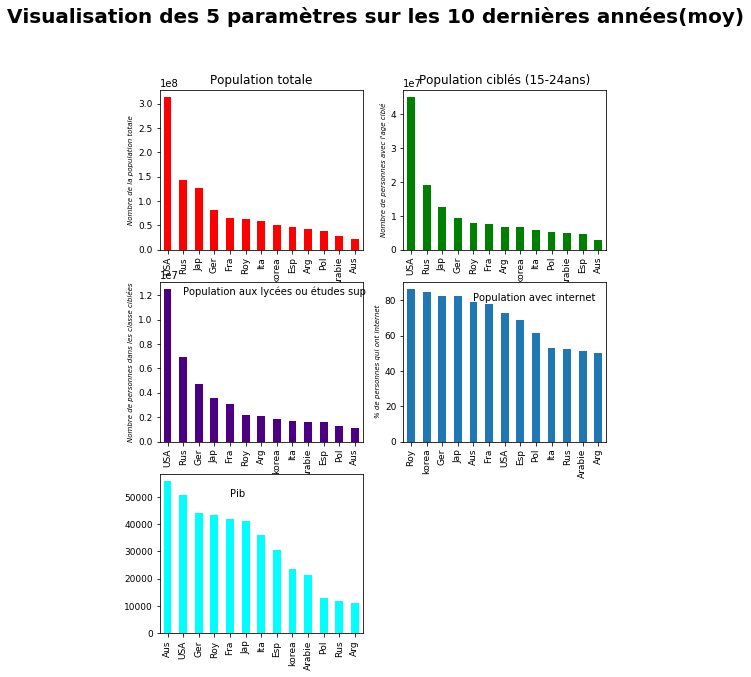

In [267]:
result = result.rename(index = { 'United Kingdom' : 'Roy','Korea, Rep.':'korea','Germany':'Ger',
                                'Japan':'Jap','Australia':'Aus','France':'Fra','United States':'USA',
                                'Spain':'Esp','Poland':'Pol','Italy':'Ita',
                                'Russian Federation':'Rus','Saudi Arabia':'Arabie','Argentina':'Arg'})
plt.figure(figsize=(8,10))
plt.suptitle('Visualisation des 5 paramètres sur les 10 dernières années(moy)', 
              fontsize = 20, x = 0.5, y = 0.995,fontweight = 'bold')
plt.subplot(321)
result = result.sort_values(by='pop_tot',ascending = False) 
result['pop_tot'].plot.bar(rot=90,subplots=True,fontsize=9,color = 'red')
plt.ylabel("Nombre de la population totale",style = 'italic',fontsize=7)
plt.title('Population totale')

plt.subplot(322)
result = result.sort_values(by='pop_cible',ascending = False)
result['pop_cible'].plot.bar(rot=90,subplots=True,fontsize=9,color = 'green')
plt.ylabel("Nombre de personnes avec l'age ciblé",style = 'italic',fontsize=7)
plt.title('Population ciblés (15-24ans)')

plt.subplot(323)
result = result.sort_values(by='pop_second',ascending = False)
result['pop_second'].plot.bar(rot=90,subplots=True,fontsize=9,color = 'indigo')
plt.title(' ')
plt.text(1, 12000000, 'Population aux lycées ou études sup')
plt.ylabel('Nombre de personnes dans les classe ciblées',style = 'italic',fontsize=7)

plt.subplot(324)
result = result.sort_values(by='pop_internet',ascending = False)
result['pop_internet'].plot.bar(rot=90,subplots=True,fontsize=9)
plt.title(' ')
plt.text(4, 80, 'Population avec internet')
plt.ylabel('% de personnes qui ont internet',style = 'italic',fontsize=7)

plt.subplot(325)
result = result.sort_values(by='pib',ascending = False)
result['pib'].plot.bar(rot=90,subplots=True,fontsize=9,color='cyan')
plt.title(' ')
plt.text(4, 50000, 'Pib')
plt.ylabel(' ',style = 'italic',fontsize=7)


In [268]:
print(result)

        pop_internet      pop_tot     pop_cible    pop_second           pib
Aus        79.011037   22536307.2  2.909226e+06  1.137823e+06  55750.826022
USA        73.125040  312589912.7  4.497100e+07  1.248668e+07  50770.419283
Ger        82.537690   81473891.3  9.232109e+06  4.701773e+06  44200.583869
Roy        86.313020   63463879.7  7.945371e+06  2.181182e+06  43452.592117
Fra        78.087650   65497904.5  7.626273e+06  3.059950e+06  41781.387137
Jap        82.484480  127649951.1  1.261169e+07  3.537458e+06  41085.960919
Ita        53.161374   59691124.9  5.785154e+06  1.671272e+06  36139.186797
Esp        68.688593   46362908.7  4.562742e+06  1.572865e+06  30709.039903
korea      84.762112   50017299.0  6.614523e+06  1.831861e+06  23679.472427
Arabie     51.508080   28715891.3  5.000126e+06  1.609364e+06  21233.416886
Pol        61.802690   38055349.4  5.139803e+06  1.298413e+06  13013.357135
Rus        52.459909  143311061.6  1.897480e+07  6.964658e+06  12037.745499
Arg        5

In [269]:
## je fais le pourcentable de la population cible 
result['% de personne cible par pays'] = result['pop_tot']/result['pop_cible']

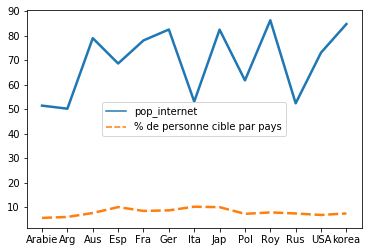

In [270]:
## je cherche une corélation entre l'utilisation d'internet et l'age 
data = result[['pop_internet','% de personne cible par pays']]
sns.lineplot(data=data, palette="tab10", linewidth=2.5)

Pour ce deuxième graphique mon objectif et d'obtenir plus de préssision sur chaque pays et de voir comment sa situation évolue sur les 10 dernières années pour ciblé les pays que l'entreprise pourra ciblé plutart. 

In [271]:
# je récupère le fichier que je laisse de côté à chaque fois , puis je récupère les pays qui m'intéressent dans chacun des paramètres

pays_surveiller_internet = df_internet_complet.reindex(columns = ["Italy","Australia","Saudi Arabia",
                                                     "Poland","Argentina","Spain","United Kingdom",
                                                     "Korea, Rep.","Germany","Japan","France","United States",
                                                     "Russian Federation"])

pays_surveiller_tot = df_pop_tot_complet.reindex(columns = ["Italy","Australia","Saudi Arabia",
                                                     "Poland","Argentina",
                                                     "Spain","United Kingdom","Korea, Rep.","Germany",
                                                     "Japan","France","United States","Russian Federation"])

pays_surveiller_cible = df_pop_cible_complet.reindex(columns = ["Italy","Australia","Saudi Arabia",
                                                     "Poland","Argentina",
                                                     "Spain","United Kingdom","Korea, Rep.","Germany",
                                                     "Japan","France","United States","Russian Federation"])
pays_surveiller_second = pop_second_complet.reindex(columns = ["Italy","Australia","Saudi Arabia",
                                                     "Poland","Argentina",
                                                     "Spain","United Kingdom","Korea, Rep.","Germany",
                                                     "Japan","France","United States","Russian Federation"])

pays_surveiller_pib = pib_complet.reindex(columns = ["Italy","Australia","Saudi Arabia",
                                                     "Poland","Argentina",
                                                     "Spain","United Kingdom","Korea, Rep.","Germany",
                                                     "Japan","France","United States","Russian Federation"])

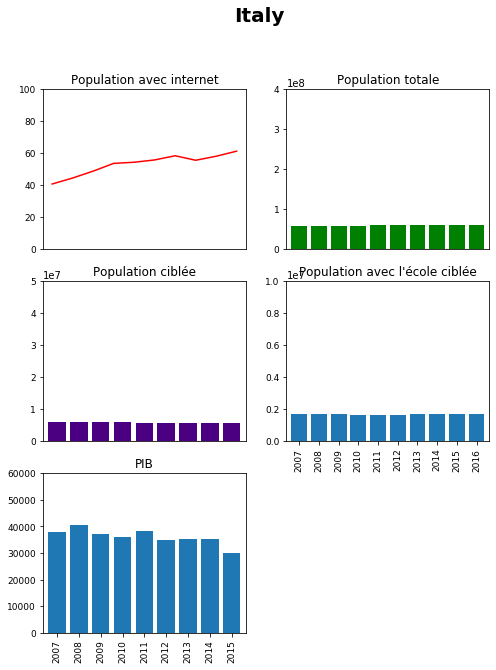

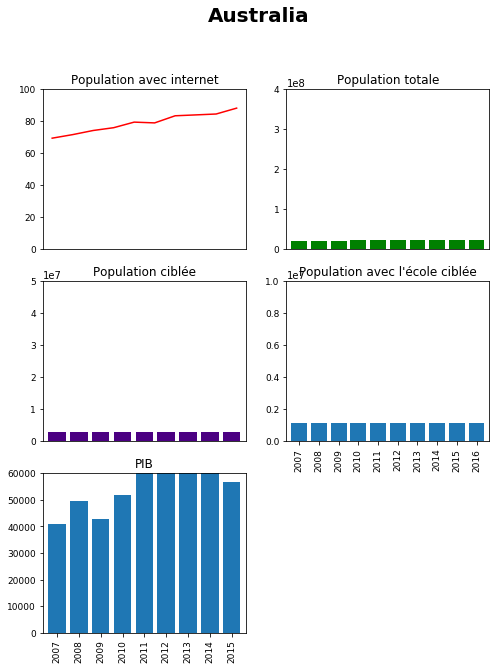

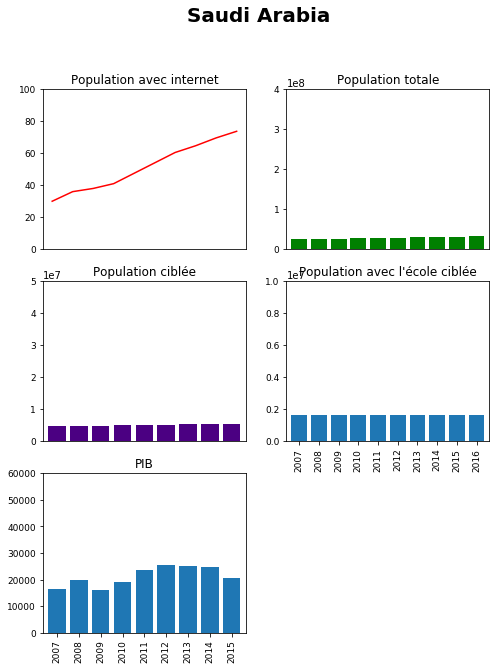

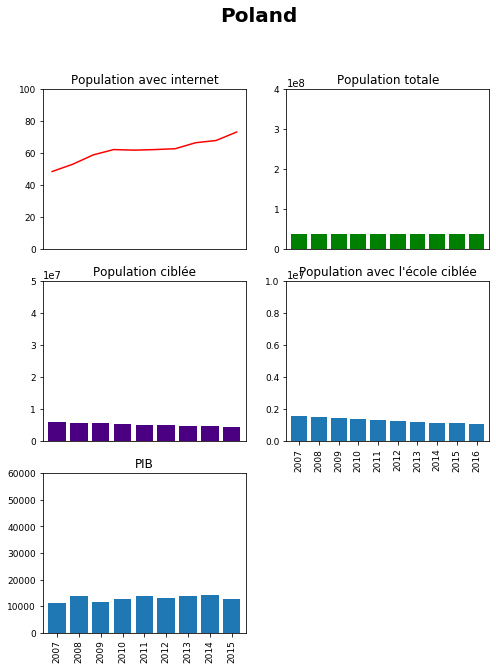

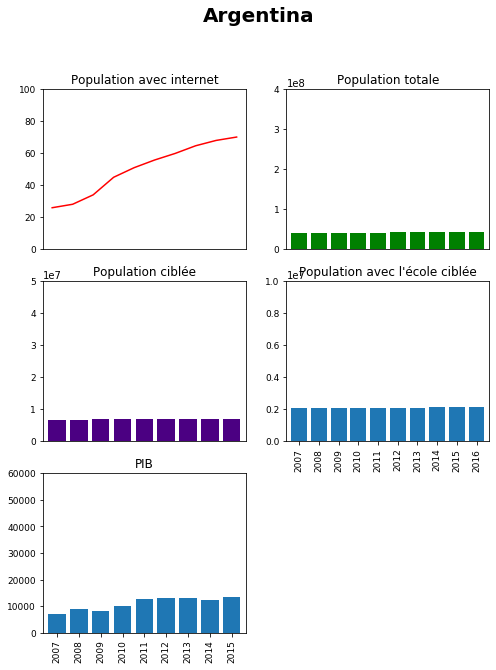

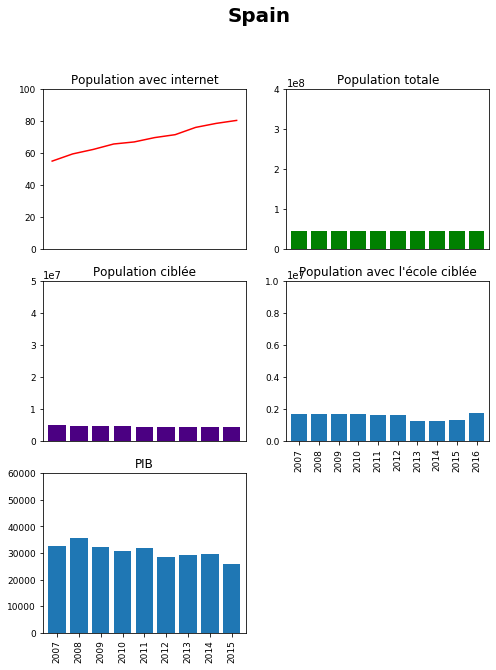

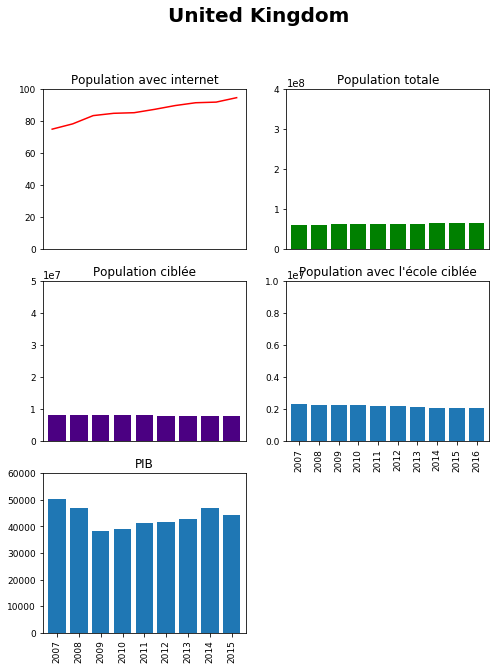

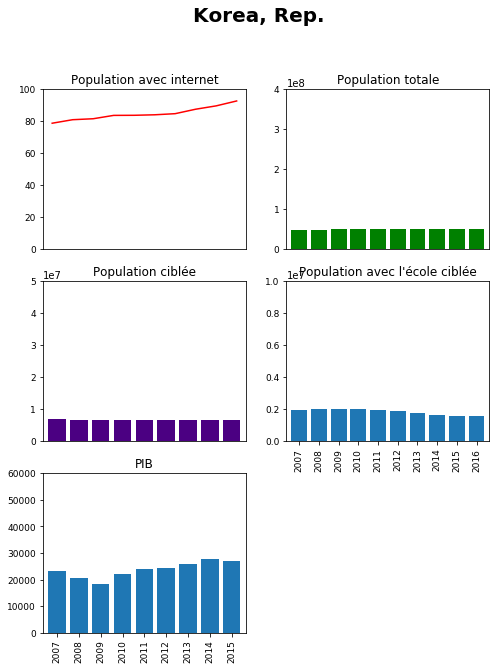

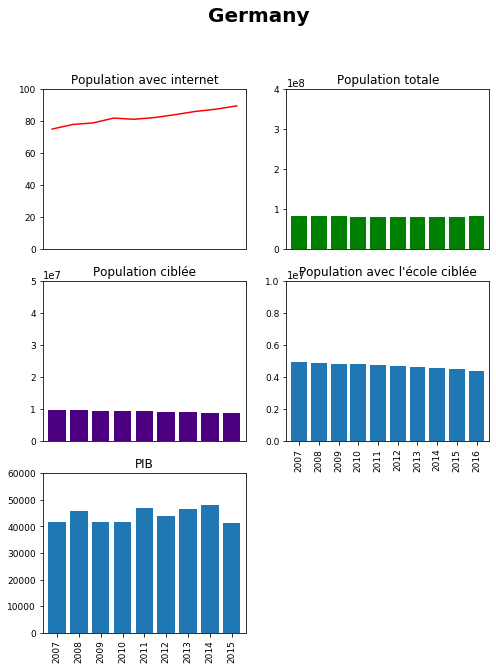

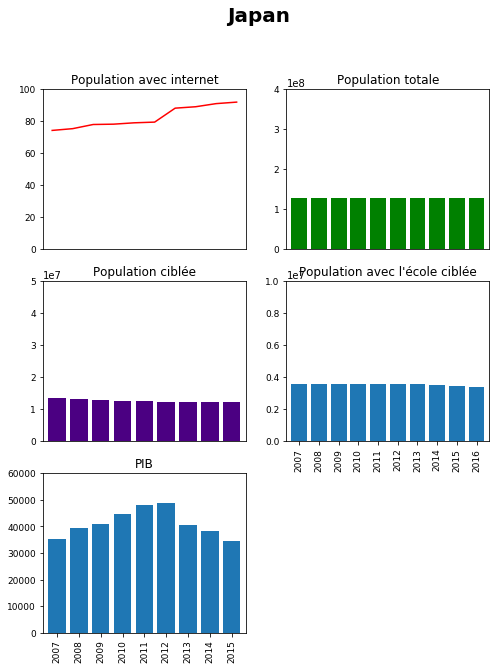

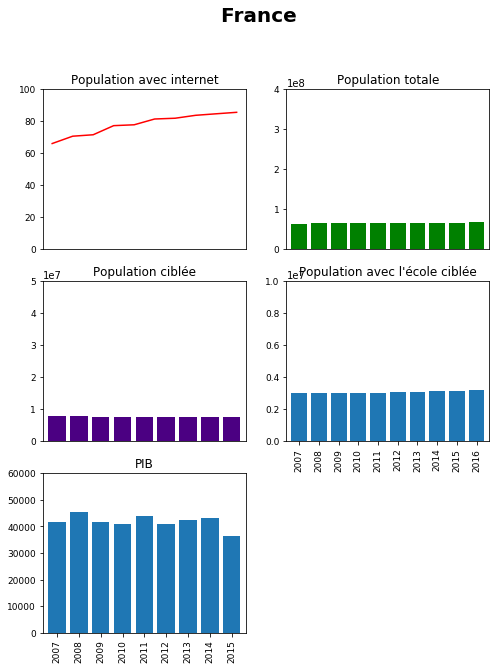

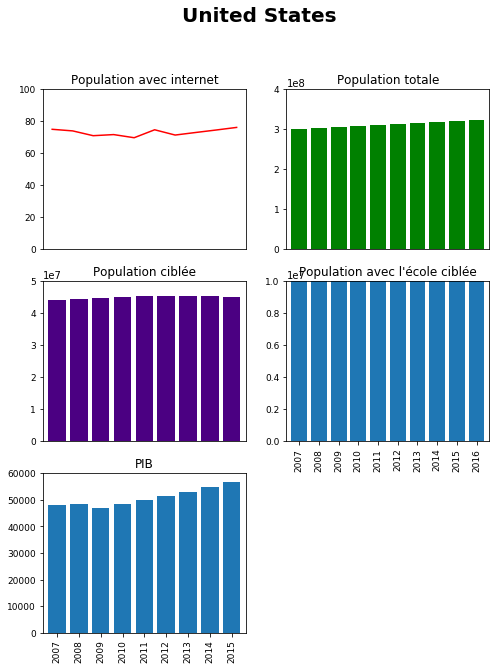

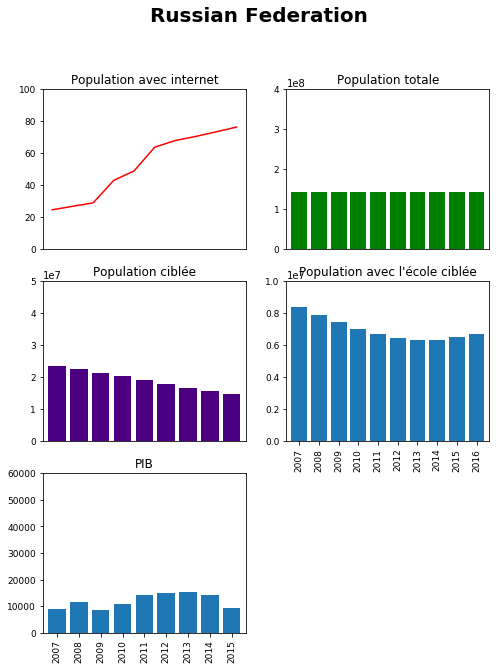

In [272]:
pays = ["Italy","Australia","Saudi Arabia","Poland","Argentina",
        "Spain","United Kingdom","Korea, Rep.","Germany","Japan","France",
        "United States","Russian Federation"]

for n in pays:

    plt.figure(figsize=(8,10))
    plt.suptitle(n,fontsize = 20, x = 0.5, y = 0.995,fontweight = 'bold')
    plt.subplot(321)
    pays_surveiller_internet[n].plot(rot=90,fontsize=9,subplots=True,color = 'red')
    plt.xticks([])
    #plt.ylabel(n,rotation=0,fontweight = 'bold')
    axes = plt.gca()
    axes.set_ylim(0,100)
    plt.title('Population avec internet')
    
    plt.subplot(322)
    pays_surveiller_tot[n].plot.bar(rot=90,fontsize=9,width=0.8,subplots=True,color = 'green')
    plt.xticks([])    
    axes = plt.gca()
    axes.set_ylim(0,400000000)
    plt.title('Population totale')
    
    plt.subplot(323)
    pays_surveiller_cible[n].plot.bar(rot=90,fontsize=9,width=0.8,subplots=True,color = 'indigo')
    plt.xticks([]) 
    plt.title('Population ciblée')
    axes = plt.gca()
    axes.set_ylim(0,50000000)

    
    plt.subplot(324)
    pays_surveiller_second[n].plot.bar(rot=90,fontsize=9,width=0.8,subplots=True)
    plt.title("Population avec l'école ciblée")
    axes = plt.gca()
    axes.set_ylim(0,10000000)
    
      
    plt.subplot(325)
    pays_surveiller_pib[n].plot.bar(rot=90,fontsize=9,width=0.8,subplots=True)
    plt.title(" ")
    plt.title('PIB')
    axes = plt.gca()
    axes.set_ylim(0,60000)  
    


# Reponses

Rappel des différentes questions : 

1 - Quels sont les pays avec un fort potentiel de clients pour nos services ?

2 - Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?

3 - Dans quels pays l'entreprise doit-elle opérer en priorité ?



1 - Au vu du nettoyage des données et aux différents seuils que j'ai mis en comparant avec la France, il y a 12 pays avec un fort potentiel de clients pour vos services : Italy,Australia,Saudi Arabia,Poland,Argentina,Spain,United Kingdom,Korea, Rep.,Germany,Japan,"United States","Russian Federation"

2- les graphiques 2 (avec les pays individuels) répondent à cette question grâce aux courbes. Celles-ci nous permettent d'observer la tendance sur les 4 paramètres que je juge important. Tous les pays sont en hausse, cependant certain pays sont en avance sur d'autres (sur internet par exemple, le nombre de personnes (population ciblée)

3-  La Russie, les Etats Unis, l'Allemagne, Le Royaume Uni et  le Japon sont les pays où l'entreprise doit opérer en priorité car, tout d'abord, leur population utilise énormément internet (> 80 %), puis le nombre de personnes ciblées et la population totale sont très hautes ce qui permet d'avoir une large population à toucher avec les produits de l'entreprise. 